<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/the-beauty-of-knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


1. data plotting and train/test sets 2/2
2. knn 3/3
3. for loop 3/3
4. standardizing predictors 2/2


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [ ]:
library(ggplot2)
library(class)
library(tidyverse)

ds = diamonds
#head(ds)

ds$price_bin = 0
ds$price_bin[ds$price > mean(ds$price)] = 1
ds$price_bin = as.factor(ds$price_bin)

ds = select(ds, carat, depth, table, x, y, price_bin)
head(ds)


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

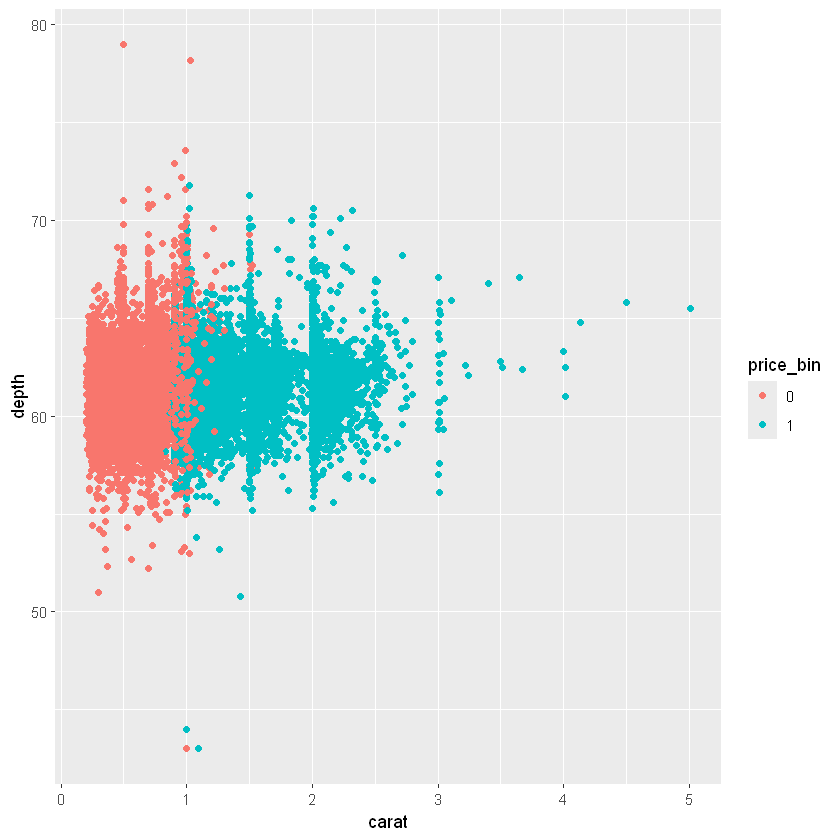

In [ ]:
ggplot(data = ds, mapping = aes(x = carat, y = depth, color = price_bin)) + geom_point()


Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> I predict that the kNN will perform decently using only these two variables. I also predict that carat will give us more information that depth about the class a given diamond will belong to. This is because there appears to be specific clusters by carat that price_bin = 0 and price_bin = 1 fall into. In contrast, the diamond dataset appears to have representation for both values of price_bin across the range of depth values.


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [ ]:
set.seed(2023)

#total number of observations
#nrow(ds)

#doing this the fastest way (according to what functions I already have in my brain)

#shuffle the order of the whole dataset by row
shuffle_index = sample(c(1:nrow(ds)), nrow(ds), replace = FALSE)
shuffle_ds = ds[shuffle_index, ]

#test = first 30 (works since ds is now randomly ordered)
test = shuffle_ds[c(1:(nrow(ds)*.3)),]
train = shuffle_ds[c((nrow(ds)*.3):nrow(ds)),]

#check
head(test)
dim(test)
head(train)
dim(train)

nrow(ds)*.3  #16182 is indeed 30% of the data


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.22,62.3,56.0,6.81,6.84,1
1.57,62.3,56.0,7.48,7.41,1
1.11,62.4,57.7,6.57,6.64,1
0.42,60.6,57.0,4.82,4.85,0
0.32,62.6,55.0,4.39,4.36,0
0.90,62.7,58.0,6.06,6.15,1


[1] 16182     6

carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.33,61.6,55,4.46,4.47,0
1.58,59.1,59,7.68,7.59,1
0.57,61.5,55,5.33,5.37,0
0.53,62.1,55,5.18,5.22,0
0.76,61.3,59,5.85,5.83,0
0.31,62.0,56,4.33,4.35,0


[1] 37759     6

[1] 16182

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [ ]:
set.seed(2023)

knn_ds = knn(train[, c("carat", "depth")], test[, c("carat", "depth")], cl = train$price_bin, k = 3)



Now, output a confusion matrix and calculate the test error to evaluate model performance.

In [ ]:
conf_matrix = table(Predicted = knn_ds, Actual = test$price_bin)
conf_matrix

test_error = mean(knn_ds != test$price_bin)
round(test_error, 4)

         Actual
Predicted    0    1
        0 9705  322
        1  541 5614

[1] 0.0533

How did your model perform?
> The model appears to have performed very well. We can tell from the test error rate (0.0533), which indicates that 5.33% of the rpedictions were not correctly classified and that 94.67% of the data was correctly classified - i.e., the model was 94.67% accurate. This appears consisten with the confusion matrix created.


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [ ]:
set.seed(2023)

knn_ds2 = knn(select(train, -price_bin, everything()), select(test, - price_bin, everything()), cl = train$price_bin, k = 3)

conf_matrix = table(Predicted = knn_ds2, Actual = test$price_bin)
conf_matrix

test_error = mean(knn_ds2 != test$price_bin)
round(test_error, 4)


         Actual
Predicted     0     1
        0 10237    10
        1     9  5926

[1] 0.0012

Did your model predictions improve?
> The model predictions do appear to have greatly improved. Specifically, the test error rate has decreased from 5.33% to 0.12%, making the model increase from 94.67% accuracy to 98.88% accuracy. The number of false positives and false negatives has also greatly falled (from 541 to 9 and 322 to 10 respectively).
>



# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [ ]:
for (k in seq(1:30)){
    knn_fits  <- knn(train[, c("carat", "depth")], test[, c("carat", "depth")], cl = train$price_bin, k)

    #overall error
    conf_df  <- table(Predicted = knn_fits, Actual = test$price_bin) # data frame of test predictions versus actual test
    output$error[k]  <- mean(knn_fits != test$price_bin)  #calculate error from conf_df and add to your output dataframe

}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05333086
2,2,0.05456680
3,3,0.05277469
4,4,0.05252750
5,5,0.05209492
6,6,0.05221851


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


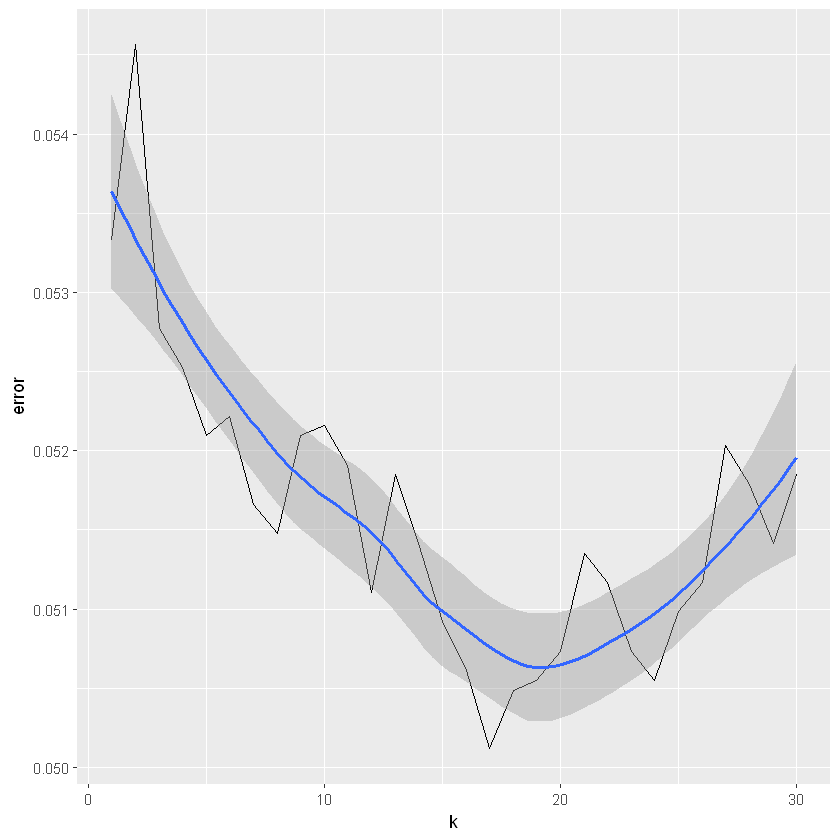

In [ ]:
ggplot(data = output, mapping = aes(x = k, y = error)) + geom_line() + geom_smooth()

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> Error seems to be reduced as k increase up until around k = 19, where error actually appears to begin to increase. As such, the best value of k for this model is around k = 20. This improves test error from our previous one at k = 3 (5.33%) to an estimated 5.17%.


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
set.seed(2023)

train_predictors = train[, c("carat", "depth")]
test_predictors = test[, c("carat", "depth")]

train_labels = train$price_bin
test_labels = test$price_bin

scaled_train <- scale(train_predictors)
scaled_test <- scale(test_predictors, center = attr(scaled_train, "scaled:center"), scale = attr(scaled_train, "scaled:scale"))

knn_ds3 = knn(scaled_train[, c("carat", "depth")], scaled_test[, c("carat", "depth")], cl = train_labels, k = 3)

conf_matrix = table(Predicted = knn_ds3, Actual = test_labels)
conf_matrix

test_error = mean(knn_ds3 != test_labels)
round(test_error, 4)


         Actual
Predicted    0    1
        0 9711  321
        1  535 5615

[1] 0.0529

What impact did rescaling the data have on your error rate?
> Rescaling the data did help to reduce error rate, reducing it from 5.33% to 5.29%


**DUE:** 11:59 pm March 19, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
